In [3]:
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:

mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)

In [5]:
mnist_fashion.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
print(mnist_fashion['DESCR'])

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [7]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape

((70000, 784), (70000,))

In [8]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [9]:
#2 x 5
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

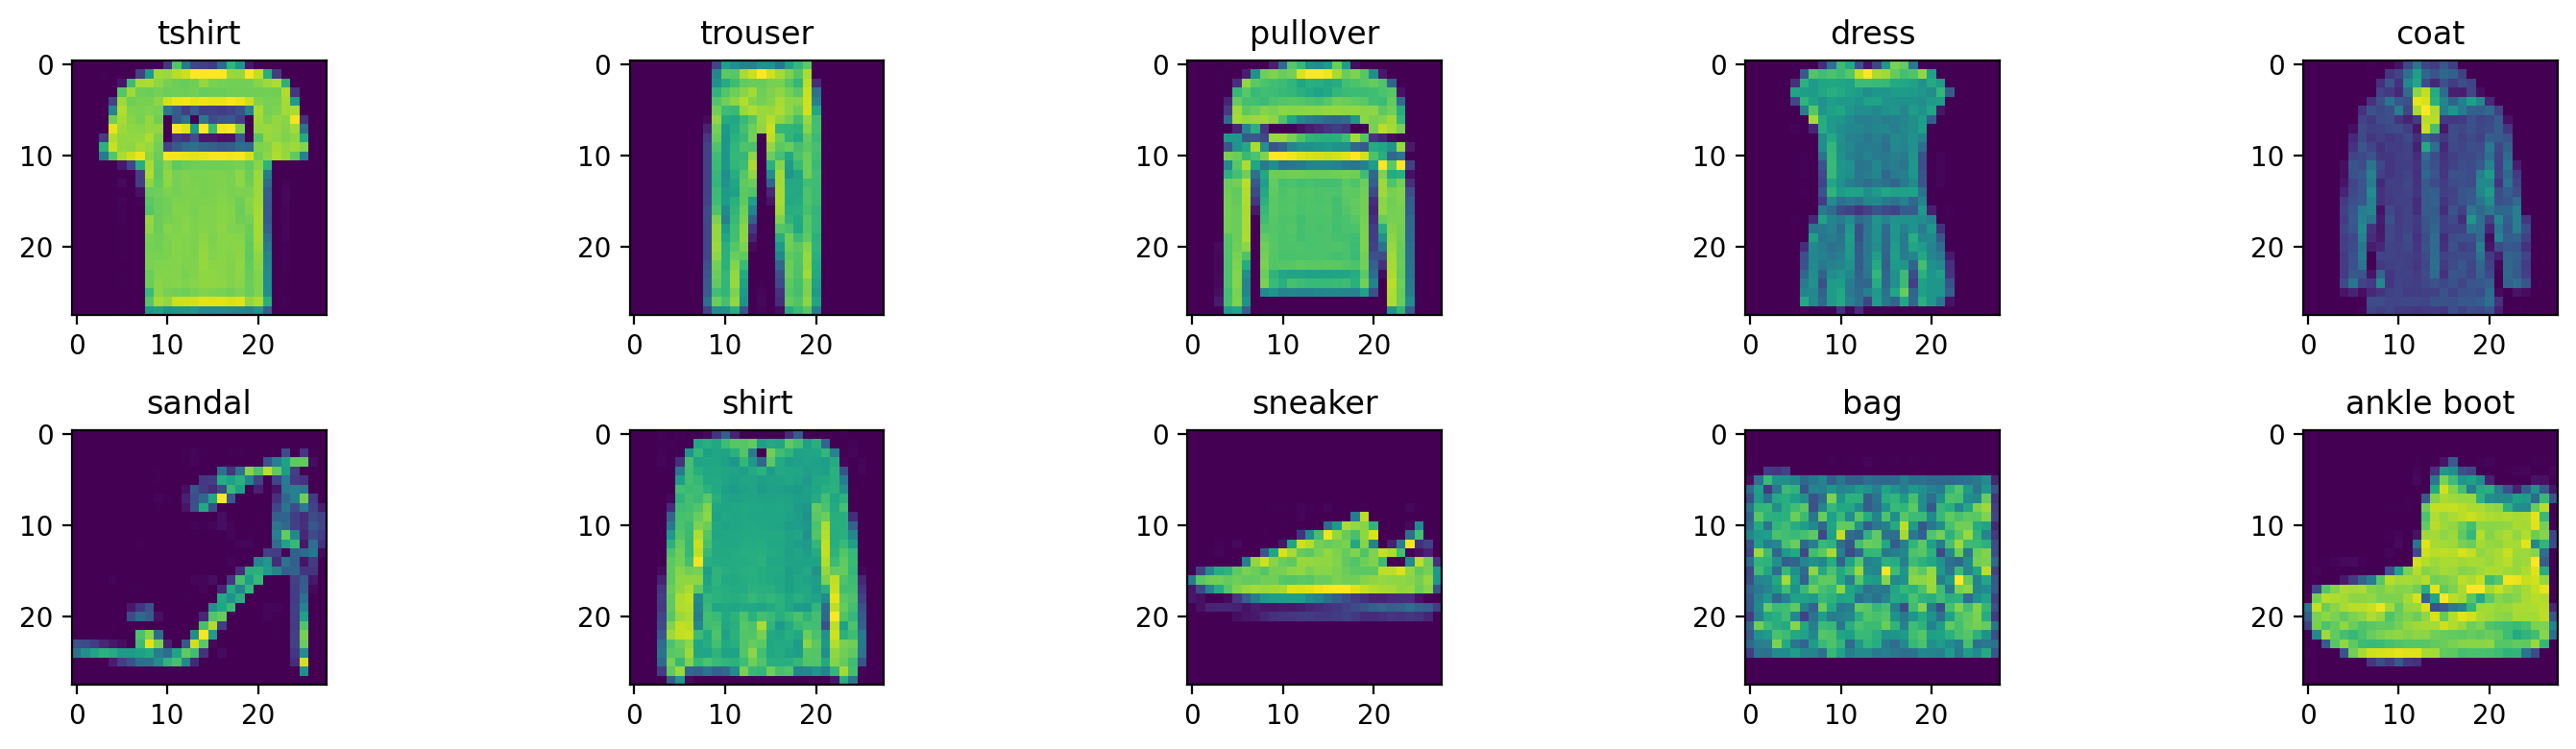

In [10]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])

plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split

converting labels into integers

In [12]:
y = y.astype('int')
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int32

Normalizing and splitting the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.2, random_state=42, stratify=y) 
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

Building neural network model

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [15]:
def get_model():
    model = Sequential()
    model.add(Flatten(input_shape=(X.shape[1],))) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    return model

In [16]:

model = get_model()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

model.fit(X_train, y_train, epochs=10) 

model.evaluate(X_test, y_test)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 655us/step - accuracy: 0.7647 - loss: 0.6665
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8587 - loss: 0.3847
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8729 - loss: 0.3450
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.8792 - loss: 0.3237
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8883 - loss: 0.2992
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8941 - loss: 0.2845
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8986 - loss: 0.2738
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9037 - loss: 0.2582
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9039 - loss: 0.2526
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9089 - loss: 0.2418
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8875 - loss: 0.3203


[0.32296669483184814, 0.8851428627967834]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


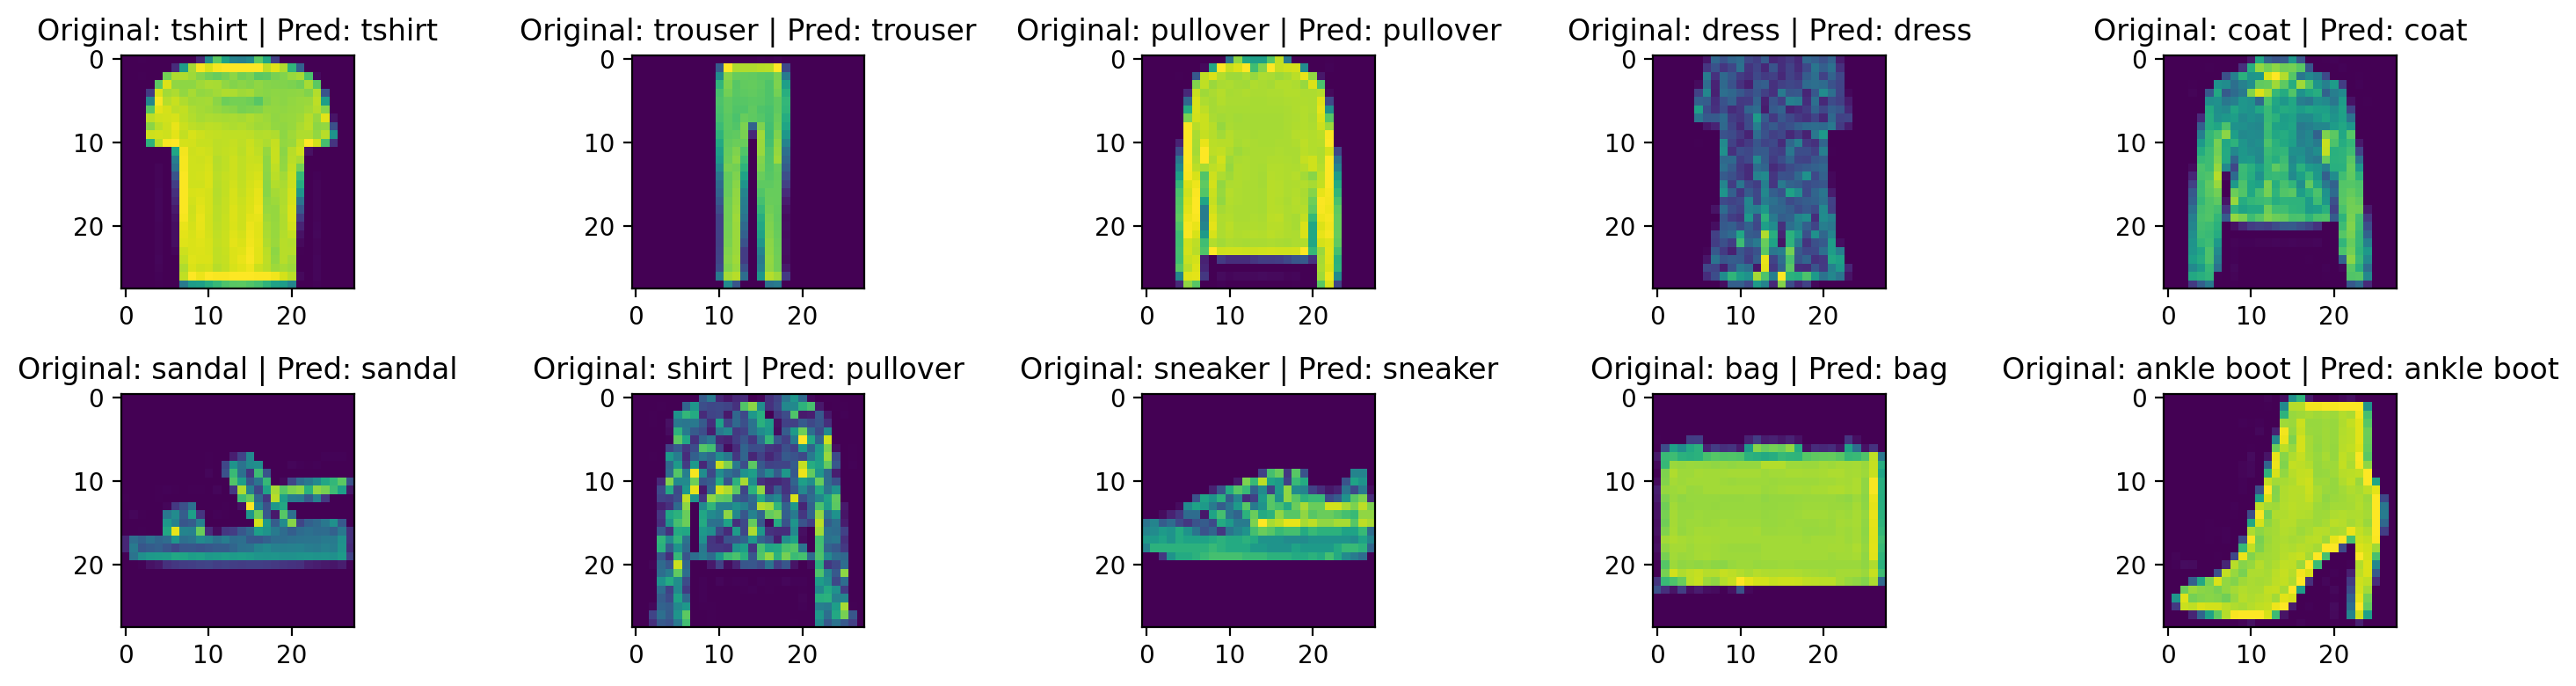

In [21]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
    plt.subplot(2, 5, i + 1)
    
    test = X_test[y_test == i].iloc[0].to_numpy()
    
    plt.imshow(test.reshape(28, 28))
    
    pred = model.predict(test.reshape(1, 784))
    idx = np.argmax(pred[0])
    pred_class = classes[idx]
    
    plt.title('Original: {} | Pred: {}'.format(classes[i], pred_class))

plt.tight_layout()
plt.show()
